In [1]:
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
bankData = pd.read_csv(file_url, sep=";")
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [40]:
print(bankData.shape)
bankData.describe()

(45211, 17)


,age,balance,day,duration,campaign,pdays,previous
count,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000
mean,40.936,1362.272,15.806,258.163,2.764,40.198,0.580
std,10.619,3044.766,8.322,257.528,3.098,100.129,2.303
min,18.000,-8019.000,1.000,0.000,1.000,-1.000,0.000
25%,33.000,72.000,8.000,103.000,1.000,-1.000,0.000
50%,39.000,448.000,16.000,180.000,2.000,-1.000,0.000
75%,48.000,1428.000,21.000,319.000,3.000,-1.000,0.000
max,95.000,102127.000,31.000,4918.000,63.000,871.000,275.000


In [41]:
jobList = ['admin','scientist','doctor','management']
# Getting two categories ( 'yes','No') for each of jobs
jobYes = [20,60,70,40]
jobNo = [80,40,30,60]

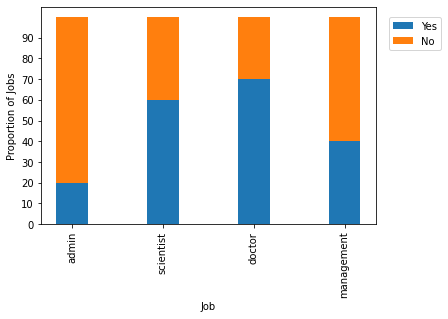

In [42]:
# Get the length of x axis labels and arranging its indexes
xlabels = len(jobList)
ind = np.arange(xlabels)
width = 0.35

p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom=jobYes)
plt.ylabel('Proportion of Jobs')
plt.xlabel('Job')
plt.xticks(ind, jobList)
plt.yticks(np.arange(0, 100, 10))
plt.legend((p1[0], p2[0]), ('Yes', 'No'), loc = (1.04,0.8))
plt.xticks(rotation=90)
plt.show()


# Business Hypothesis Testing for Age versus Propensity for a Term Loan
- We will be verifying how the purchased term deposits are distributed by age.
we will count the number of records for each age group using the combination of .groupby().agg().reset_index() methods from pandas

In [44]:
filter_mask = bankData['y'] == 'yes'
bankSub1 = bankData[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

In [7]:
alt.Chart(bankSub1).mark_line().encode(x = 'age', y = 'agegrp')

alt.Chart(...)

- From the plot, we can see that the highest number of term deposit purchases are done by customers within an age range between 25 and 40, with the propensity to buy tapering off with age. 
- This relationship is quite counterintuitive from our assumptions in the hypothesis
- We are taking the data based on the absolute count of customers in each age range. If the proportion of banking customers is higher within the age range of 25 to 40, then we are very likely to get a plot like the one that we have got. 
- What we really should plot is the proportion of customers, within each age group, who buy a term deposit.

In [45]:
# Group the data per age using the groupby() method and find the total number of customers under each age group using the agg() method
ageTot = bankData.groupby('age')['y'].agg(ageTot = 'count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [46]:
ageProp = bankData.groupby(['age','y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [47]:
# Merge both of these DataFrames based on the age variable using the pd.merge() function, and then divide each category of propensity within each age 
# group by the total customers in the respective age group to get the proportion of customers

ageComb = pd.merge(ageProp, ageTot,left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.667
1,18,yes,7,12,58.333
2,19,no,24,35,68.571
3,19,yes,11,35,31.429
4,20,no,35,50,70.000


In [48]:
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y') # fact for separate plots

alt.FacetChart(...)

- in the first graph, with the age group beginning from 22 to 60, individuals would not be inclined to purchase the term deposit. 
- However, in the second graph, we see the opposite, where the age group of 60 and over are much more inclined to purchase the term deposit plan.

We can see from the plots that the propensity to buy term deposits is low for age groups from 22 to around 60.

After 60, we see a rising trend in the demand for term deposits. Another interesting fact we can observe is the higher proportion of term deposit purchases for ages younger than 20.

# Business Hypothesis Testing to Find Employment Status versus Propensity for Term Deposits
we will use a similar route and verify the relationship between employment status and term deposit purchase propensity.  
Formulate the hypothesis between employment status and the propensity for term deposits: High paying employees prefer term deposits than other categories of employees.

In [49]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
# Find distribution of employment status
counts = bankData.groupby('job')['y'].agg(Count = 'count').reset_index()
catCounts = bankData.groupby(['job','y'])['y'].agg(catCount = 'count').reset_index()
data = pd.merge(catCounts,counts,left_on=['job'], right_on=['job'])
data['prop'] = (data.catCount/data.Count)*100
data.head()

,job,y,catCount,Count,prop
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312


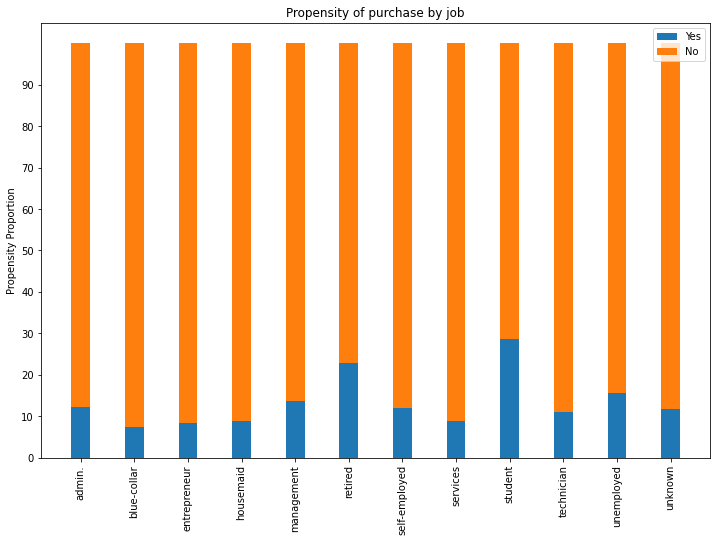

In [14]:
# alt.Chart(data).mark_line().encode(x='job', y = 'prop').facet(column = 'y')
xlabels = len(set(data.job.values))
ind = np.arange(xlabels)
width = 0.35

fig, ax = plt.subplots(figsize = (12,8))
p1 = ax.bar(ind,data[data['y'] == 'yes'].prop,width,label = 'Yes')
p1 = ax.bar(ind,data[data['y'] == 'no'].prop, width, bottom = data[data['y'] == 'yes'].prop,label = 'No')
plt.xticks(ind, data.job.unique(), rotation = 90)
plt.yticks(np.arange(0,100,10))
plt.title('Propensity of purchase by job')
plt.ylabel('Propensity Proportion')
plt.legend()
plt.show()

# Business Driven Feature Engineering

Business-driven feature engineering is the process of transforming raw variables based on business intuitions that were derived during the exploratory analysis. It entails transforming data and creating new variables based on business factors or drivers that influence a business problem.  
  
In the previous exercises on exploratory analysis, we explored the relationship of a single variable with the dependent variable. In this exercise, we will combine multiple variables and then derive new features. We will explore the relationship between an asset portfolio and the propensity for term deposit purchases. An asset portfolio is the combination of all assets and liabilities the customer has with the bank. We will combine assets and liabilities such as bank balance, home ownership, and loans to get a new feature called an asset index.

In [15]:
# 1. find a relationship between housing and the propensity for term deposits
bankData.groupby(['housing','y'])['y'].agg(houseTot = 'count').reset_index()
# the propensity to buy term deposits is much higher for people who do not own a house compared with those who do own one: 
# ( 3354 / ( 3354 + 16727) = 17% to 1935 / ( 1935 + 23195) = 8%)

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


In [16]:
# 2. Explore the 'loan' variable to find its relationship with the propensity for a term deposit
bankData.groupby(['loan','y'])['y'].agg(loanTot = 'count').reset_index()
# In the case of loan portfolios, the propensity to buy term deposits is higher for customers without loans: 
# ( 4805 / ( 4805 + 33162) = 12 % to 484/ ( 484 + 6760) = 6%)

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


Housing and loans were categorical data and finding a relationship was straightforward. However, bank balance data is numerical and to analyze it, we need to have a different strategy. 
- One common strategy is to convert the continuous numerical data into ordinal data and look at how the propensity varies across each category.  
- To convert numerical values into ordinal values, we first find the quantile values and take them as threshold values.  
- Quantile values represent certain threshold values for data distribution. For example, when we say the 25th quantile percentile, we are talking about a value below which 25% of the data exists. The quantile can be calculated using the np.quantile() function in NumPy.

In [17]:
np.quantile(bankData['balance'],[0.25,0.50,0.75]) # quantile thresholds

array([  72.,  448., 1428.])

In [18]:
bankData['balanceClass'] = 'Quant1'
bankData.loc[(bankData['balance'] > 72) & (bankData.balance < 448), 'balanceClass'] = 'Quant2'
bankData.loc[(bankData['balance'] > 448) & (bankData.balance < 1428), 'balanceClass'] = 'Quant3'
bankData.loc[bankData.balance > 1428, 'balanceClass'] = 'Quant4'
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [19]:
balanceTot = bankData.groupby('balanceClass')['y'].agg(balanceTot = 'count').reset_index()
balanceTot.head()

,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [20]:
balanceProp = bankData.groupby(['balanceClass','y'])['y'].agg(balanceCat = 'count').reset_index()
balanceProp.head()

,balanceClass,y,balanceCat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884


In [21]:
balanceComb = pd.merge(balanceProp, balanceTot, on = ['balanceClass'])
balanceComb['catProp'] = (balanceComb.balanceCat/ balanceComb.balanceTot)*100
balanceComb[balanceComb['y'] == 'yes']

,balanceClass,y,balanceCat,balanceTot,catProp
1,Quant1,yes,823,11340,7.257496
3,Quant2,yes,1226,11275,10.873614
5,Quant3,yes,1415,11299,12.523232
7,Quant4,yes,1825,11297,16.154731


From the distribution of data, we can see that, as we move from Quantile 1 to Quantile 4, the proportion of customers who buy term deposits keeps on increasing. For instance, of all of the customers who belong to Quant 1, 7.25% have bought term deposits (we get this percentage from catProp). This proportion increases to 10.87 % for Quant 2 and thereafter to 12.52 % and 16.15% for Quant 3 and Quant4, respectively. From this trend, we can conclude that individuals with higher balances have more propensity for term deposits.

## Feature Engineering
a higher bank balance or home ownership will have a positive bearing on the overall asset index and, therefore, will be assigned a higher weight. In contrast, the presence of a loan will be a liability and, therefore, will have to have a lower weight. Let's give a weight of 5 if the customer has a house and 1 in its absence. Similarly, we can give a weight of 1 if the customer has a loan and 5 in case of no loans

In [22]:
x = bankData[['balance']].values.astype(float)
minmaxScaler = preprocessing.MinMaxScaler() #The purpose of normalization is to bring all of the variables that we are using to create the new feature into a common scale.
bankData['balanceTran'] = minmaxScaler.fit_transform(x)
bankData['balanceTran'] = bankData['balanceTran'] + 0.00001
# After creating the normalized variable, add a small value of 0.001 so as to eliminate the 0 values in the variable.
# The purpose of adding this small value is because, in the subsequent steps, we will be multiplying three transformed variables together to 
# form a composite index. The small value is added to avoid the variable values becoming 0 during the multiplying operation.
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822


When a customer has a loan, it is given a weight of 1, and when there's no loan, the weight assigned is 5. The value of 1 and 5 are intuitive weights we are assigning. What values we assign can vary based on the business context you may be provided with.

In [23]:
# Let us transform values for loan data
bankData['loanTran'] = 1
# Giving a weight of 5 if there is no loan
bankData.loc[bankData['loan'] == 'no', 'loanTran'] = 5
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5


In [24]:
# Let us transform values for Housing data
bankData['houseTran'] = 1 # 1 for no house and 5 for yes house
bankData.loc[bankData.housing == 'yes','houseTran'] = 5
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1


Once all the transformed variables are created, we can multiply all of the transformed variables together to create a new index called assetIndex. This is a composite index that represents the combined effect of all three variables.

In [25]:
# Let us now create the new variable which is a product of all these
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112


In [26]:
# Explore the propensity with respect to the composite index by adopting a similar strategy of converting the numerical values of the asset index 
# into ordinal values by taking the quantiles and then mapping the quantiles to the propensity of term deposit purchases
q1, q2, q3 = [round(x,2) for x in np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])]
bankData['assetClass'] = 'Quant1'
bankData.loc[(bankData.assetIndex > q1) & (bankData.assetIndex < q2), 'assetClass'] = 'Quant2'
bankData.loc[(bankData.assetIndex > q2) & (bankData.assetIndex < q3), 'assetClass'] = 'Quant3'
bankData.loc[(bankData.assetIndex > q3), 'assetClass'] = 'Quant4'
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [27]:
assetTot = bankData.groupby('assetClass')['y'].agg(assetTot = 'count').reset_index()
assetProp = bankData.groupby(['assetClass','y'])['y'].agg(assetCat = 'count').reset_index()
assetComb = pd.merge(assetProp,assetTot,on=['assetClass'])
assetComb['catProp'] = (assetComb.assetCat/assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10921,12212,89.428431
1,Quant1,yes,1291,12212,10.571569
2,Quant2,no,8436,10400,81.115385
3,Quant2,yes,1964,10400,18.884615
4,Quant3,no,10144,11121,91.214819
5,Quant3,yes,977,11121,8.785181
6,Quant4,no,10421,11478,90.791079
7,Quant4,yes,1057,11478,9.208921


In [28]:
assetComb[assetComb['y']=='yes']

,assetClass,y,assetCat,assetTot,catProp
1,Quant1,yes,1291,12212,10.571569
3,Quant2,yes,1964,10400,18.884615
5,Quant3,yes,977,11121,8.785181
7,Quant4,yes,1057,11478,9.208921


From the new feature we created, we can see that 18.88% (we get this percentage from catProp) of customers who are in Quant2 have bought term deposits compared to 10.57 % for Quant1, 8.78% for Quant3, and 9.28% for Quant4.   
Since Quant2 has the highest proportion of customers who have bought term deposits, we can conclude that customers in Quant2 have higher propensity to purchase the term deposits than all other customers.

# Data Driven Feature Engineering
Looking at the data types such as categorical or numeric and then deriving summary statistics is a good way to take a quick peek into data before you do some of the downstream feature engineering steps

In [29]:
print(bankData.dtypes)
bankData.describe()

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object


,age,balance,day,duration,campaign,pdays,previous,balanceTran,loanTran,houseTran,assetIndex
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.085181,4.359094,3.223353,1.179189
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.027643,1.467280,1.987511,0.952080
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000010,1.000000,1.000000,0.000010
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.073467,5.000000,1.000000,0.376686
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.076881,5.000000,5.000000,0.569204
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.085778,5.000000,5.000000,1.902725
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000010,5.000000,5.000000,15.108152


The purpose of a descriptive summary is to get a quick feel of the data with respect to the distribution and some basic statistics such as mean and standard deviation. Getting a perspective on the summary statistics is critical for thinking about what kind of transformations are required for each variable.For instance, in the earlier exercises, we converted the numerical data into categorical variables based on the quantile values. Intuitions for transforming variables would come from the quick summary statistics that we can derive from the dataset.

## Correlation Matrix and Visualization

Correlation, as you know, is a measure that indicates how two variables fluctuate together. Any correlation value of 1, or near 1, indicates that those variables are highly correlated. Highly correlated variables can sometimes be damaging for the veracity of models and, in many circumstances, we make the decision to eliminate such variables or to combine them to form composite or interactive variables.



In [30]:
set_option('display.width',150)
set_option('precision',3)
bankNumeric = bankData[['age','balance','day','duration','campaign','pdays','previous']]
bankCorr = bankNumeric.corr(method = 'pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


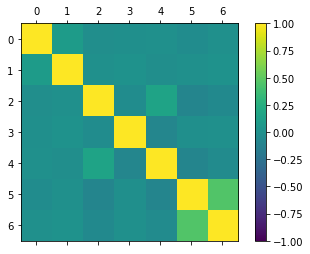

In [31]:
corFig = plt.figure() # pyplot.figure() is the plotting class that is instantiated.
figAxis = corFig.add_subplot(111) # .add_subplot() is a grid parameter for the plotting. 
corAx = figAxis.matshow(bankCorr,vmin=-1,vmax=1) # The .matshow() function is to display the plot, and the vmin and vmax arguments are for normalizing the data in the plot.
corFig.colorbar(corAx)
plt.show()


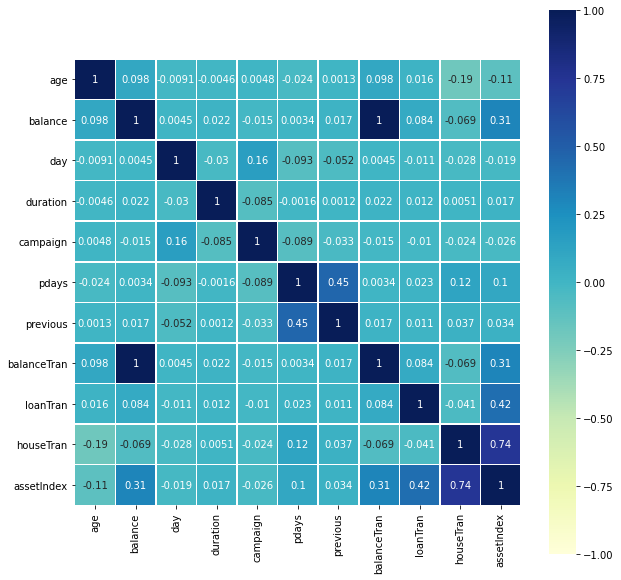

In [32]:
bankNumeric = bankData.select_dtypes(np.number)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(bankNumeric.corr(method='pearson'),square = True, ax = ax, vmin = -1, vmax = 1, linewidths = 0.5, 
            cmap="YlGnBu", annot = True)
plt.show()

Some obvious candidates are the high correlation between 'balance' and 'balanceTran' and the 'asset index' with many of the transformed variables that we created in the earlier exercise. Other than that, there aren't many variables that are highly correlated.

## Skewness of data

Skewness can cause machine learning models to underperform. Many machine learning models assume normally distributed data or data structures to follow the Gaussian structure.

A very effective area where we can apply feature engineering is:
- by looking at the skewness of data and then
-  correcting the skewness through *normalization* of the data. 
- Skewness can be *visualized by plotting the data using histograms and density plots*

In [33]:
bankNumeric.skew()

age             0.685
balance         8.360
day             0.093
duration        3.144
campaign        4.899
pdays           2.616
previous       41.846
balanceTran     8.360
loanTran       -1.853
houseTran      -0.225
assetIndex      1.221
dtype: float64

The preceding matrix is the **skewness index**. 
- Any value closer to 0 indicates a low degree of skewness. 
- Positive values indicate right skew and negative values, left skew.  

Variables that show higher values of right skew and left skew are candidates for further feature engineering by normalization.

## Histograms

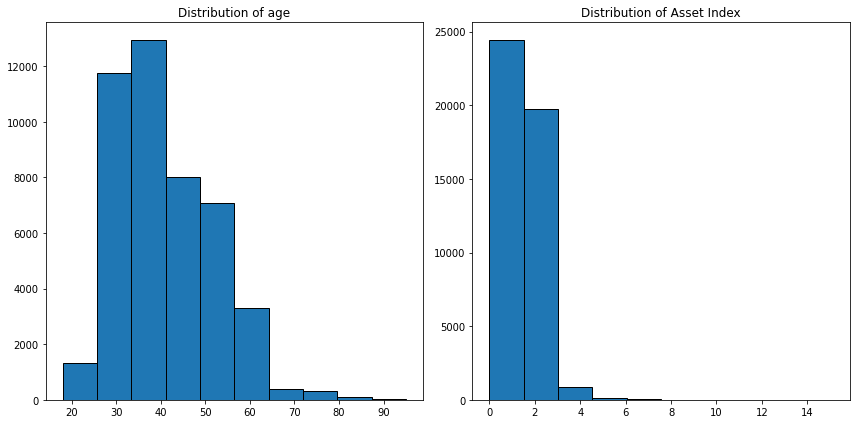

In [34]:
fig, axs = plt.subplots(1,2, figsize = (12,6))

axs[0].hist(bankNumeric['age'], edgecolor = 'k')
axs[0].set_title('Distribution of age')

axs[1].hist(bankNumeric['assetIndex'], edgecolor = 'k')
axs[1].set_title('Distribution of Asset Index')

plt.tight_layout()
plt.show()

From the histogram, we can see that the age variable has a distribution closer to the bell curve with a lower degree of skewness. In contrast, the asset index shows a relatively higher right skew, which makes it a more probable candidate for normalization.

## Density Plots

Density plots help in visualizing the distribution of data. A density plot can be created using the kind = 'density' parameter  
Density plots help in getting a smoother visualization of the distribution of the data. From the density plot of Age, we can see that it has a distribution similar to a bell curve.

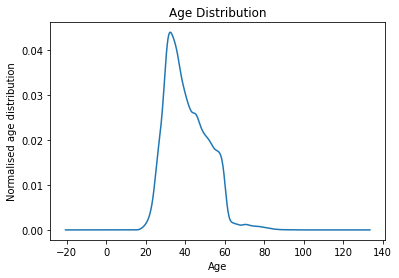

In [35]:
bankNumeric['age'].plot(kind = 'density',subplots = False,layout = (1,1))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Normalised age distribution')
plt.show()

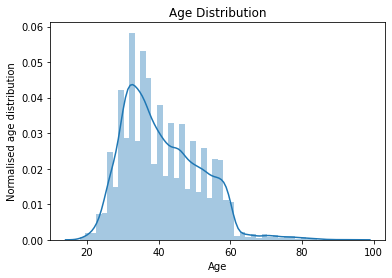

In [36]:
sns.distplot(bankNumeric['age'], )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Normalised age distribution')
plt.show()

# Other Feature Engineering Methods
- Standard scaler standardizes **data to a mean of 0 and standard deviation of 1**. 
  - The mean is the average of the data and the standard deviation is a measure of the spread of data. 
  - By standardizing to the same mean and standard deviation, comparison across different distributions of data is enabled.

- The normalizer function **normalizes the length of data**. 
  - This means that each value in a row is divided by the normalization of the row vector to normalize the row. 
    
- The normalizer function is applied on the rows while standard scaler is applied column-wise. The normalizer and standard scaler functions are important feature engineering steps that are applied to the data before downstream modeling steps.

In [37]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaling = StandardScaler().fit(bankNumeric)
rescaledNum = scaling.transform(bankNumeric)
set_printoptions(precision = 3)
print(rescaledNum)

[[ 1.607  0.256 -1.298 ...  0.437  0.894  1.184]
 [ 0.289 -0.438 -1.298 ...  0.437  0.894  0.68 ]
 [-0.747 -0.447 -1.298 ... -2.289  0.894 -0.856]
 ...
 [ 2.925  1.43   0.143 ...  0.437 -1.119 -0.584]
 [ 1.513 -0.228  0.143 ...  0.437 -1.119 -0.824]
 [-0.371  0.528  0.143 ...  0.437 -1.119 -0.715]]


In [38]:
# Normalizing Data ( Length of 1)
from sklearn.preprocessing import Normalizer
normaliser = Normalizer().fit(bankNumeric)
normalisedNum = normaliser.transform(bankNumeric)

set_printoptions(precision = 3)
print(normalisedNum)

[[2.686e-02 9.923e-01 2.315e-03 ... 2.315e-03 2.315e-03 1.068e-03]
 [2.747e-01 1.810e-01 3.121e-02 ... 3.121e-02 3.121e-02 1.141e-02]
 [3.966e-01 2.404e-02 6.010e-02 ... 1.202e-02 6.010e-02 4.377e-03]
 ...
 [1.235e-02 9.805e-01 2.917e-03 ... 8.579e-04 1.716e-04 1.070e-04]
 [6.775e-02 7.940e-01 2.021e-02 ... 5.943e-03 1.189e-03 4.688e-04]
 [1.234e-02 9.906e-01 5.668e-03 ... 1.667e-03 3.334e-04 1.664e-04]]
